# 图像处理+180776+胡欣毅(Python版)
# 6周上课随堂任务

## 1. 题目清单

1. 图像模糊化
2. 基于边缘检测的图像边缘增强(清晰度加强)
3. 反增强过程实现模糊效果

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

# 第一部分

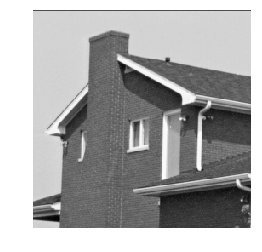

(256, 256)

In [2]:
im = cv2.imread('../data/4.1.05.tiff')
gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
plt.figure() #figsize=(8,8))
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()
gray.shape

获取模糊图像$$f_{out}$$

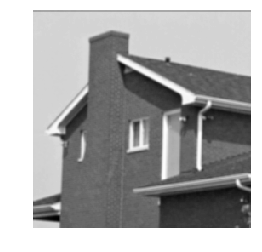

In [3]:
#低通滤波器
low_filter = np.array([[1,1,1],
                  [1,1,1],
                  [1,1,1]])/9.0
f_out = cv2.filter2D(gray,-1,low_filter)
plt.imshow(f_out,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

In [4]:
# Laplace算子
Laplace = np.array([[1, 1, 1],
                    [1,-8, 1],
                    [1, 1, 1]])

计算$$ \Delta f$$

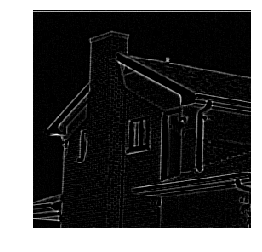

In [5]:
deta_f = cv2.filter2D(f_out,-1,Laplace)
plt.imshow(deta_f,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

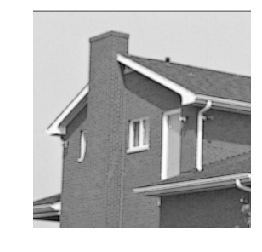

In [6]:
labd = .5
re_build = f_out - (labd * deta_f).astype(int)
plt.imshow(re_build,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

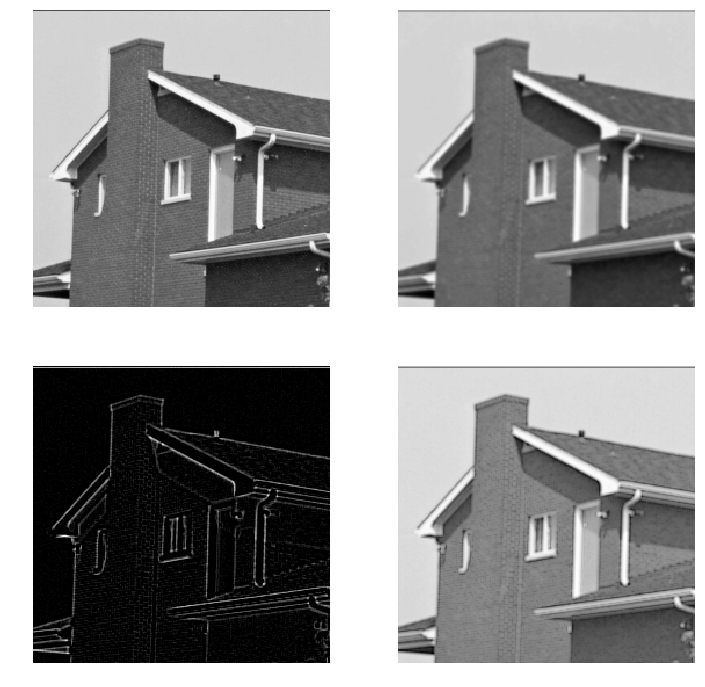

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.subplot(222)
plt.imshow(f_out,cmap='gray')
plt.axis("off")
plt.subplot(223)
plt.imshow(deta_f,cmap='gray')
plt.axis("off")
plt.subplot(224)
plt.imshow(re_build,cmap='gray')
plt.axis("off")
plt.show()

试试高斯模糊

计算$$ \Delta f$$

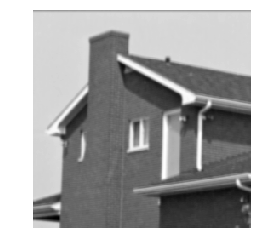

In [8]:
# 高斯
gaosi_filter = np.array([
            [1,4,7,4,1],
            [4,16,26,16,-4],
            [7,26,41,26,7],
            [1,4,7,4,1],
            [4,16,26,16,-4]])/273.0

f_out = cv2.filter2D(gray,-1,gaosi_filter)
plt.imshow(f_out,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

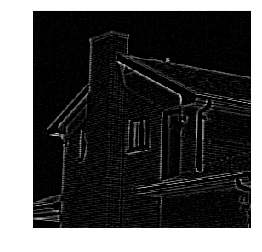

In [9]:
deta_f = cv2.filter2D(f_out,-1,Laplace)
plt.imshow(deta_f,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

$$ f - \frac{t}{2}\Delta f $$

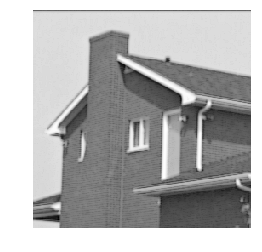

In [10]:
labd = .5
re_build = f_out - (labd * deta_f).astype(int)
plt.imshow(re_build,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

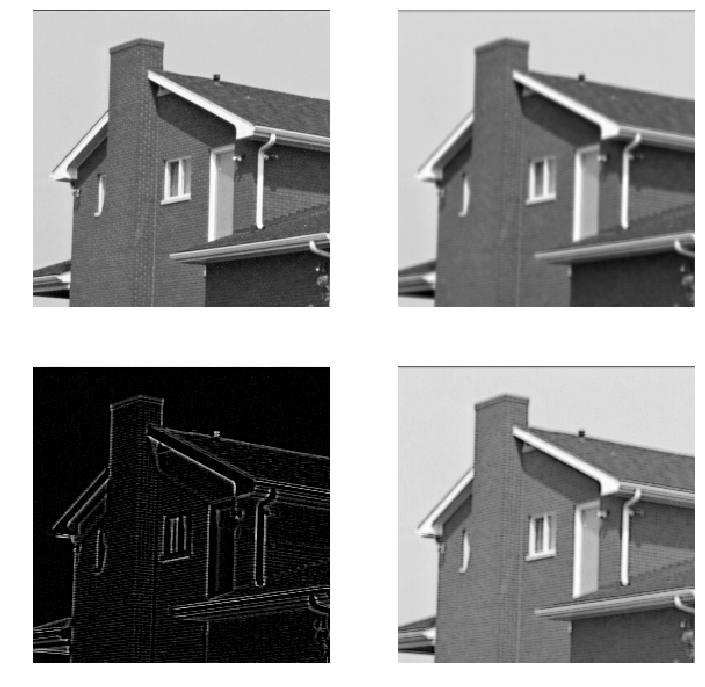

In [11]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.subplot(222)
plt.imshow(f_out,cmap='gray')
plt.axis("off")
plt.subplot(223)
plt.imshow(deta_f,cmap='gray')
plt.axis("off")
plt.subplot(224)
plt.imshow(re_build,cmap='gray')
plt.axis("off")
plt.show()

# 第二部分

应老师要求不掉库函数，考虑自己的卷积操作

In [12]:
def my_filter2D( img , kel ):
    m,n = kel.shape
    # out 是输出
    out = np.zeros(img.shape)
    # mat 是补完 0 的
    mat = np.zeros( (img.shape[0]+2*m-2, img.shape[1]+2*n-2) )
    # 扩充
    mat[m-1:-(m-1),n-1:-(n-1)] = img
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i,j] = np.multiply(mat[i:i+m,j:j+n] , kel ).sum()    
    return out


In [13]:
# 测试 2 维卷积
my_filter2D(np.ones((3,3)),np.ones((2,2)) )

array([[1., 2., 2.],
       [2., 4., 4.],
       [2., 4., 4.]])

In [14]:
def my_filter3D( img , kel ):
    m,n = kel.shape
    # out 是输出
    out = np.zeros(img.shape)
    # mat 是补完 0 的
    mat = np.zeros( (img.shape[0]+2*m-2, img.shape[1]+2*n-2 , img.shape[2]) )
    # 扩充
    mat[m-1:-(m-1),n-1:-(n-1),:] = img
    
    # 对层数进行循环先
    for z in range(img.shape[2]):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                out[i,j,z] = np.multiply(mat[i:i+m,j:j+n,z] , kel ).sum()    
    return out

In [15]:
# 测试 3 维卷积
my_filter3D(np.ones((3,3,3)),np.ones((2,2)) )[...,0]

array([[1., 2., 2.],
       [2., 4., 4.],
       [2., 4., 4.]])

# 第三部分

反过程实现模糊效果

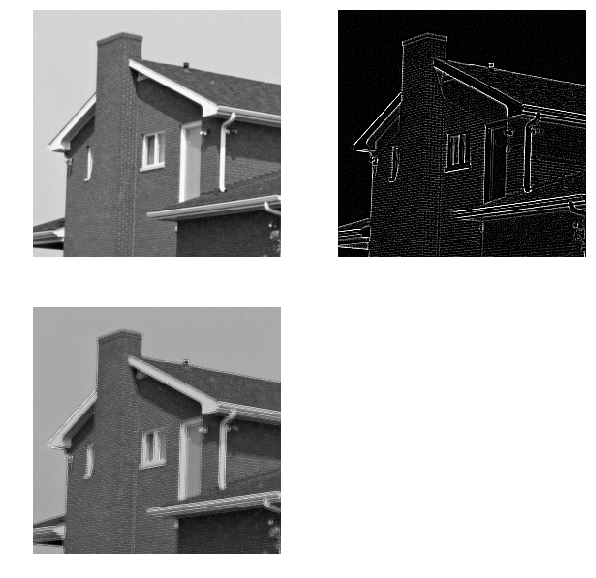

In [16]:
t = .5
deta_f = cv2.filter2D(gray,-1,Laplace)
f_out = (t * deta_f).astype(int) + gray

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(gray,cmap='gray')
plt.axis("off")#去除坐标轴
plt.subplot(222)
plt.imshow(deta_f,cmap='gray')
plt.axis("off")#去除坐标轴
plt.subplot(223)
plt.imshow(f_out,cmap='gray')
plt.axis("off")#去除坐标轴
plt.show()

# 图像处理+180776+胡欣毅(C++版)

[c++](c++/hxy.cpp)